In [9]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D,Add,Concatenate,Softmax,Maximum
from keras.preprocessing import sequence

from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape
import keras.backend as K
import math
from keras.activations import softmax,tanh

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7728405722328134124, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16031557223
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6337427243947754723
 physical_device_desc: "device: 0, name: Quadro P5000, pci bus id: 0000:00:05.0, compute capability: 6.1"]

In [3]:
with open('multiview-data-gender0.pckl','rb') as file:
    train_images,train_labels,test_images,test_labels = pickle.load(file)

In [6]:
cnn_base1.summaryary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
# def attention_block(x,K,labels,w,h):
#     H = Conv2D(K, kernel_size=(w, h), padding="same")(x)
#     H = BatchNormalization()(H)
#     spatial_softmax = Lambda(lambda x:softmax(H,axis=3))(H)
#     O = Conv2D(labels*K, kernel_size=(w, h), padding="same")(x)
#     O = BatchNormalization()(O)
#     rH = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=3))(spatial_softmax)
#     o = Lambda(lambda x: tf.einsum('bijk,bijk->bk',x[0],x[1]))([O,rH])
#     tempH = Conv2D(K, kernel_size=(w, h), padding="same")(x)
#     tempH = BatchNormalization()(tempH)
#     gh = Lambda(lambda x: softmax(tanh(tf.einsum('bijk,bijk->bk',x[0],x[1])),axis=1))([tempH,spatial_softmax])
#     rgh = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=1))(gh)
#     of = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([rgh,o])
#     new_shape = Reshape((K,labels))(of)
#     out = Lambda(lambda x: keras.backend.mean(x,axis=1))(new_shape)
#     #x = Conv2D(K, kernel_size=(w, h), padding="same")(x)
#     inter = Lambda(lambda x: Flatten()(x[:,:,:,0]))(x)
#     weight = Dense(1,activation='tanh')(inter)
#     return out,weight

In [15]:
cnn_base1 = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
cnn_base2 = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
cnn_base3 = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
cnn_base4 = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
for idx,cnn in enumerate([cnn_base1,cnn_base2,cnn_base3,cnn_base4]):
    for layer in cnn.layers:
        cnn.get_layer(name=layer.name).name=layer.name+'_'+str(idx)
        print(layer.name)

input_5_0
block1_conv1_0
block1_conv2_0
block1_pool_0
block2_conv1_0
block2_conv2_0
block2_pool_0
block3_conv1_0
block3_conv2_0
block3_conv3_0
block3_pool_0
block4_conv1_0
block4_conv2_0
block4_conv3_0
block4_pool_0
block5_conv1_0
block5_conv2_0
block5_conv3_0
block5_pool_0
input_6_1
block1_conv1_1
block1_conv2_1
block1_pool_1
block2_conv1_1
block2_conv2_1
block2_pool_1
block3_conv1_1
block3_conv2_1
block3_conv3_1
block3_pool_1
block4_conv1_1
block4_conv2_1
block4_conv3_1
block4_pool_1
block5_conv1_1
block5_conv2_1
block5_conv3_1
block5_pool_1
input_7_2
block1_conv1_2
block1_conv2_2
block1_pool_2
block2_conv1_2
block2_conv2_2
block2_pool_2
block3_conv1_2
block3_conv2_2
block3_conv3_2
block3_pool_2
block4_conv1_2
block4_conv2_2
block4_conv3_2
block4_pool_2
block5_conv1_2
block5_conv2_2
block5_conv3_2
block5_pool_2
input_8_3
block1_conv1_3
block1_conv2_3
block1_pool_3
block2_conv1_3
block2_conv2_3
block2_pool_3
block3_conv1_3
block3_conv2_3
block3_conv3_3
block3_pool_3
block4_conv1_3
blo

In [26]:
# K = 10
# labels = 1
# w,h = 3,3

for cnn in [cnn_base1,cnn_base2,cnn_base3,cnn_base4]:
    for layer in cnn.layers:
        layer.trainable = False

x1 = cnn_base1.get_layer('block5_conv3_0').output
x2 = cnn_base2.get_layer('block5_conv3_1').output
x3 = cnn_base3.get_layer('block5_conv3_2').output
x4 = cnn_base4.get_layer('block5_conv3_3').output


x = Maximum()([x1,x2,x3,x4])

x = Flatten()(x)
x = Dense(512,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(512,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(inputs=[cnn_base1.input,cnn_base2.input,cnn_base3.input,cnn_base4.input], outputs=x)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
print(model.summary())
initial_weights = model.get_weights()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5_0 (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_6_1 (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_7_2 (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_8_3 (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_con

In [27]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5_0 (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_6_1 (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_7_2 (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_8_3 (InputLayer)          (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_con

In [ ]:
train_pred = []
test_pred = []

train_scores = []
test_scores = []

history_record = []

for i in range(5):
    print("Loading file")
    with open('multiview-data-gender'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('multi_gender_classification_vgg16'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    train_ls = []
    for l in train_labels:
        if l=='M':
            train_ls.append(1)
        else:
            train_ls.append(0)
    test_ls = []
    for l in test_labels:
        if l=='M':
            test_ls.append(1)
        else:
            test_ls.append(0)
    train_input = [np.array(train_images)[:,0,:,:,:],np.array(train_images)[:,1,:,:,:],
            np.array(train_images)[:,2,:,:,:],np.array(train_images)[:,3,:,:,:]]
    test_input = [np.array(test_images)[:,0,:,:,:],np.array(test_images)[:,1,:,:,:],
            np.array(test_images)[:,2,:,:,:],np.array(test_images)[:,3,:,:,:]]
    history = model.fit(x=train_input,y=np.array(train_ls),batch_size=5,epochs=30,
                       validation_data=(test_input,np.array(test_ls)))
    train_score = model.evaluate(x=np.array(train_images),y=np.array(train_ls),batch_size=50)
    test_score = model.evaluate(x=np.array(test_images),y=np.array(test_ls),batch_size=50)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print("predicting")
    print("Test Score",test_score)
    train_predictions = model.predict(x=np.array(train_images),batch_size=50)
    test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
    train_pred.append(train_predictions)
    test_pred.append(test_predictions)

Loading file
setting initial weights
Train on 264 samples, validate on 23 samples
Epoch 1/30
264/264 [==============================] - 21s 78ms/step - loss: 0.9850 - acc: 0.5985 - val_loss: 0.7999 - val_acc: 0.6087
Epoch 2/30
264/264 [==============================] - 8s 30ms/step - loss: 0.5590 - acc: 0.7311 - val_loss: 1.0552 - val_acc: 0.6957
Epoch 3/30
264/264 [==============================] - 8s 30ms/step - loss: 0.3894 - acc: 0.8295 - val_loss: 0.7255 - val_acc: 0.6957
Epoch 4/30
264/264 [==============================] - 8s 30ms/step - loss: 0.3513 - acc: 0.8598 - val_loss: 0.6624 - val_acc: 0.6087
Epoch 5/30
264/264 [==============================] - 8s 30ms/step - loss: 0.2258 - acc: 0.9053 - val_loss: 0.6682 - val_acc: 0.7826
Epoch 6/30
255/264 [===========================>..] - ETA: 0s - loss: 0.1920 - acc: 0.9216

In [ ]:
historys = []
for hist in history_record:
    historys.append(hist.history)
    
if rotated:
    with open('vgg16-predictions-rotated.pckl','wb') as file:
        pickle.dump((train_pred,test_pred,historys,train_scores,test_scores),file)
else:
    with open('vgg16-predictions.pckl','wb') as file:
        pickle.dump((train_pred,test_pred,historys,train_scores,test_scores),file)

In [ ]:
rotated

In [ ]:
with open('vgg16-predictions-rotated.pckl','rb') as vgg16:
    train_pred,test_pred,historys,train_scores,test_scores = pickle.load(vgg16)

In [ ]:
plt.subplot(3,1,1)
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('Total Loss')
plt.show()
plt.subplot(3,1,2)
plt.plot(history.history['localization_output_iou_metric'])
plt.xlabel('epochs')
plt.ylabel('IoU Metric')
plt.show()
plt.subplot(3,1,3)
plt.plot(history.history['classification_output_loss'])
plt.xlabel('epochs')
plt.ylabel('Cross Entropy Loss')
plt.show()

In [6]:
from sklearn import preprocessing
import numpy
le = preprocessing.LabelEncoder()
le.classes_ = numpy.load('classes.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'classes.npy'

In [22]:
idx = np.random.randint(low=0,high=np.array(test_images).shape[0])
bb,classify = model.predict(np.expand_dims(np.array(test_images)[idx],0))
[[xmin,ymin,xmax,ymax]]= bb
img = cv2.rectangle(np.array(test_images)[idx], (xmin,ymin), (xmax,ymax), (0,255,0), 4)
pil_im = Image.fromarray(img)
a = np.argmax(classify,axis=1)[0]
label = le.inverse_transform(np.argmax(classify,axis=1))
#print(label[0])
#y = ymin - 15 if ymin - 15 > 15 else ymin + 15
plt.title("Predicted: "+label[0]+", Actual: "+le.inverse_transform(np.argmax(test_predictions[idx])))
plt.imshow(pil_im)
print(label[0])

/home/parmeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


IndexError: list index out of range

In [ ]:
# print(np.mean(np.array(test_cvscores)[:,1]))
# print(np.std(np.array(test_cvscores)[:,1]))

# print(np.mean(np.array(validation_cvscores)[:,1]))
# print(np.std(np.array(validation_cvscores)[:,1]))

In [ ]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)!=predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
plt.show()

In [ ]:
f, axarr = plt.subplots(10)
f.set_figheight(50)
f.set_figwidth(100)
eq_list = np.array(labels_test)==predicted_labels
eq_idx_list = [i for i, x in enumerate(eq_list) if x]
random.shuffle(eq_idx_list)
for idx,i in enumerate(eq_idx_list[0:10]):
    im = images[i]
    imag = normalize_image(im)
    #plt.imshow(imag)
    axarr[idx].imshow(imag)
    axarr[idx].title.set_text('Actual: '+np.array(labels_test)[i]+', Predicted: '+predicted_labels[i])
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_test, predicted_labels,labels=np.unique(labels_))
print(cm)

NameError: name 'labels_test' is not defined

In [ ]:
confusion_matrix(labels_test,predicted_labels)

labels_=list(np.unique(labels_test))
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels_)
ax.set_yticklabels([''] + labels_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [35]:
idx = 101

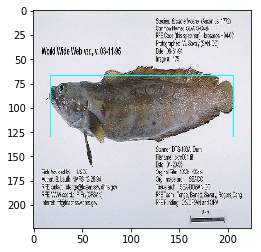

In [36]:
img = test_images[idx]
h,w,cx,cy,angle = testing_bboxes[idx]
rectange_points = [(w/2.0,h/2.0),(w/2.0,-h/2.0),(-w/2.0,-h/2.0),((-w/2.0,h/2.0))]
points = []
#angle = (3.14159265358979323846/2) - angle
for xr,yr in rectange_points:
    xr = math.cos(angle)*xr - math.sin(angle)*yr
    yr = math.sin(angle)*xr + math.cos(angle)*yr

    xr = xr + cx
    yr = yr + cy
    points.append(xr)
    points.append(yr)
pts = np.array(points)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,np.int32([pts]),True,(0,255,255))
pil_im = Image.fromarray(img)
plt.imshow(pil_im)

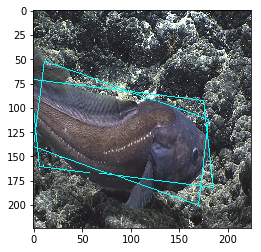

In [28]:
idx = 5
img = test_images[idx]
pts = np.array(test_bboxes[idx])
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,np.int32([pts]),True,(0,255,255))
pil_im = Image.fromarray(img)
plt.imshow(pil_im)

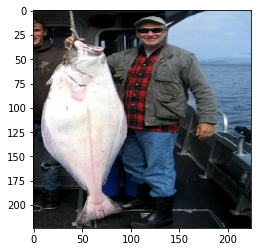

In [78]:
idx = 22
img = test_images[idx]
[[w,h,cx,cy,angle]] = mod.predict(np.expand_dims(test_images[idx],axis=0))[0]
rectange_points = [(w/2.0,h/2.0),(w/2.0,-h/2.0),(-w/2.0,-h/2.0),((-w/2.0,h/2.0))]
points = []
#angle = (3.14159265358979323846/2) - angle
for xr,yr in rectange_points:
    xr = math.cos(angle)*xr - math.sin(angle)*yr
    yr = math.sin(angle)*xr + math.cos(angle)*yr

    xr = xr + cx
    yr = yr + cy
    points.append(xr)
    points.append(yr)
pts = np.array(points)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,np.int32([pts]),True,(0,255,255))
pil_im = Image.fromarray(img)
plt.imshow(pil_im)

In [57]:
w,h,cx,cy,angle

(0.9990823, 0.00075547496, 4.3644923e-05, 0.00010419192, 1.4448374e-05)

In [53]:
mod.predict(np.expand_dims(test_images[6],axis=0))

[array([[149.92322 ,  82.941605, 126.17159 , 112.74586 ,  -0.889715]],
       dtype=float32),
 array([[1.1669288e-03, 9.3571018e-08, 7.4474216e-02, 3.6341050e-01,
         5.6094831e-01]], dtype=float32)]

In [79]:
test_scores

[]